# Convert the Singapore dataset into frames (train/test dataset) allowing some videos to be completely into test dataset

This is a jupyter notebook to experiment and generate the frames of the videos in the Singapore Maritime 
Dataset (SMD) as jpg images. This notebook allows for some videos to be included completely in the test dataset.

Dataset available here: https://sites.google.com/site/dilipprasad/home/singapore-maritime-dataset

If this dataset is used please cite it as:

D. K. Prasad, D. Rajan, L. Rachmawati, E. Rajabaly, and C. Quek, "Video Processing from Electro-optical Sensors for Object Detection and Tracking in Maritime Environment: A Survey," IEEE Transactions on Intelligent Transportation Systems (IEEE), 2017. 

In [2]:
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

Load the videos paths for both onboard and onshore data and generate dictionaries with it.

In [3]:
VIDEOS_PATH_ONSHORE = "VIS_Onshore/Videos"
OBJECT_ANNOTATIONS_ONSHORE_PATH = "VIS_Onshore/ObjectGT"
VIDEO_FRAMES_PATH_ONSHORE = 'VIS_Onshore_frames/'

VIDEOS_PATH_ONBOARD = "VIS_Onboard/Videos"
OBJECT_ANNOTATIONS_ONBOARD_PATH = "VIS_Onboard/ObjectGT"
VIDEO_FRAMES_PATH_ONBOARD = 'VIS_Onboard_frames/'

VIDEOS_PATH_NIR = "NIR/Videos"
OBJECT_ANNOTATIONS_NIR_PATH = "NIR/ObjectGT"
VIDEO_FRAMES_PATH_NIR = 'NIR_frames/'

In [4]:
video_files_onshore = [join(VIDEOS_PATH_ONSHORE, f) for f in listdir(VIDEOS_PATH_ONSHORE) 
                       if isfile(join(VIDEOS_PATH_ONSHORE, f))]

video_files_onboard = [join(VIDEOS_PATH_ONBOARD, f) for f in listdir(VIDEOS_PATH_ONBOARD) 
                       if isfile(join(VIDEOS_PATH_ONBOARD, f))]

video_files_nir = [join(VIDEOS_PATH_NIR, f) for f in listdir(VIDEOS_PATH_NIR) 
                       if isfile(join(VIDEOS_PATH_NIR, f))]

In [5]:
video_files_onshore_dict = {}
for f in listdir(VIDEOS_PATH_ONSHORE):
    if isfile(join(VIDEOS_PATH_ONSHORE, f)):
        video_files_onshore_dict[f.split('.')[0]] = join(VIDEOS_PATH_ONSHORE, f)
        
video_files_onboard_dict = {}
for f in listdir(VIDEOS_PATH_ONBOARD):
    if isfile(join(VIDEOS_PATH_ONBOARD, f)):
        video_files_onboard_dict[f.split('.')[0]] = join(VIDEOS_PATH_ONBOARD, f)
        
video_files_nir_dict = {}
for f in listdir(VIDEOS_PATH_NIR):
    if isfile(join(VIDEOS_PATH_NIR, f)):
        video_files_nir_dict[f.split('.')[0]] = join(VIDEOS_PATH_NIR, f)

Load the ground truth files paths for both onboard and onshore data and generate dictionaries with it.

In [6]:
object_gt_files_onshore_dict = {}
for f in listdir(OBJECT_ANNOTATIONS_ONSHORE_PATH):
    if isfile(join(OBJECT_ANNOTATIONS_ONSHORE_PATH, f)):
        object_gt_files_onshore_dict[f.split('.')[0].replace('_ObjectGT','')] = join(OBJECT_ANNOTATIONS_ONSHORE_PATH, f)
        
object_gt_files_onboard_dict = {}
for f in listdir(OBJECT_ANNOTATIONS_ONBOARD_PATH):
    if isfile(join(OBJECT_ANNOTATIONS_ONBOARD_PATH, f)):
        object_gt_files_onboard_dict[f.split('.')[0].replace('_ObjectGT','')] = join(OBJECT_ANNOTATIONS_ONBOARD_PATH, f)
        
object_gt_files_nir_dict = {}
for f in listdir(OBJECT_ANNOTATIONS_NIR_PATH):
    if isfile(join(OBJECT_ANNOTATIONS_NIR_PATH, f)):
        object_gt_files_nir_dict[f.split('.')[0].replace('_ObjectGT','')] = join(OBJECT_ANNOTATIONS_NIR_PATH, f)

Do some sanity checks to see if there are equal numbers of videos and ground truth files.

In [7]:
print('Number of onshore videos: ', len(video_files_onshore_dict))
print('Number of onshore ground truth files: ', len(object_gt_files_onshore_dict))

print('Number of onboard videos: ', len(video_files_onboard_dict))
print('Number of onboard ground truth files: ', len(object_gt_files_onboard_dict))

print('Number of near infra-red videos: ', len(video_files_nir_dict))
print('Number of near infra-red ground truth files: ', len(object_gt_files_nir_dict))

Number of onshore videos:  40
Number of onshore ground truth files:  36
Number of onboard videos:  11
Number of onboard ground truth files:  4
Number of near infra-red videos:  30
Number of near infra-red ground truth files:  23


So there are videos without ground truth files. These unlabelled data might be good for testing later. Let's find these videos.

In [8]:
# ground truth files are missing - find the corresponding videos
missing_files_onshore = []
for key in video_files_onshore_dict.keys():
    if key not in object_gt_files_onshore_dict:
        missing_files_onshore.append(key)
        
print("Unlabelled onshore videos: ", missing_files_onshore)

missing_files_onboard = []
for key in video_files_onboard_dict.keys():
    if key not in object_gt_files_onboard_dict:
        missing_files_onboard.append(key)
        
print("Unlabelled onbord videos: ", missing_files_onboard)

missing_files_nir = []
for key in video_files_nir_dict.keys():
    if key not in object_gt_files_nir_dict:
        missing_files_nir.append(key)
        
print("Unlabelled nir videos: ", missing_files_nir)


# set whether to remove or not the missing videos from the frames generation later
remove_missing_files = True
if remove_missing_files:
    for key in missing_files_onshore:
        del video_files_onshore_dict[key]
    for key in missing_files_onboard:
        del video_files_onboard_dict[key]
    for key in missing_files_nir:
        del video_files_nir_dict[key]
        
    print()
    print('Size of video dictionaries after removing the videos without ground truth:')
    print('Number of onshore videos: ', len(video_files_onshore_dict))
    print('Number of onshore ground truth files: ', len(object_gt_files_onshore_dict))

    print('Number of onboard videos: ', len(video_files_onboard_dict))
    print('Number of onboard ground truth files: ', len(object_gt_files_onboard_dict))

    print('Number of near infra-red videos: ', len(video_files_nir_dict))
    print('Number of near infra-red ground truth files: ', len(object_gt_files_nir_dict))

Unlabelled onshore videos:  ['MVI_1470_VIS', 'MVI_1471_VIS', 'MVI_1483_VIS', 'MVI_1485_VIS']
Unlabelled onbord videos:  ['MVI_0796_VIS_OB', 'MVI_0789_VIS_OB', 'MVI_0794_VIS_OB', 'MVI_0795_VIS_OB', 'MVI_0792_VIS_OB', 'MVI_0788_VIS_OB', 'MVI_0804_VIS_OB']
Unlabelled nir videos:  ['MVI_1478_NIR', 'MVI_1475_NIR', 'MVI_1481_NIR', 'MVI_1474_NIR', 'MVI_1483_NIR', 'MVI_1484_NIR', 'MVI_1480_NIR']

Size of video dictionaries after removing the videos without ground truth:
Number of onshore videos:  36
Number of onshore ground truth files:  36
Number of onboard videos:  4
Number of onboard ground truth files:  4
Number of near infra-red videos:  23
Number of near infra-red ground truth files:  23


Remove some videos to be included completely in the test dataset

In [9]:
# adjust this if you want to change the videos to be used completely for testing
full_test_videos_dict = {
    'MVI_1584_VIS':'VIS_Onshore/Videos/MVI_1584_VIS.avi',
    'MVI_1482_VIS':'VIS_Onshore/Videos/MVI_1482_VIS.avi',
    'MVI_0799_VIS_OB':'VIS_Onboard/Videos/MVI_0799_VIS_OB.avi',
    'MVI_1520_NIR':'NIR/Videos/MVI_1520_NIR.avi'
}

for key in full_test_videos_dict:
    if key in video_files_onshore_dict:
        del video_files_onshore_dict[key]
    if key in video_files_onboard_dict:
        del video_files_onboard_dict[key]
    if key in video_files_nir_dict:
        del video_files_nir_dict[key]
    
print('Size of video dictionaries after removing the videos saved fully for testing:')
print('Number of onshore videos: ', len(video_files_onshore_dict))
print('Number of onshore ground truth files: ', len(object_gt_files_onshore_dict))

print('Number of onboard videos: ', len(video_files_onboard_dict))
print('Number of onboard ground truth files: ', len(object_gt_files_onboard_dict))

print('Number of near infra-red videos: ', len(video_files_nir_dict))
print('Number of near infra-red ground truth files: ', len(object_gt_files_nir_dict))

Size of video dictionaries after removing the videos saved fully for testing:
Number of onshore videos:  34
Number of onshore ground truth files:  36
Number of onboard videos:  3
Number of onboard ground truth files:  4
Number of near infra-red videos:  22
Number of near infra-red ground truth files:  23


In [10]:
print(video_files_onshore_dict)

{'MVI_1578_VIS': 'VIS_Onshore/Videos/MVI_1578_VIS.avi', 'MVI_1612_VIS': 'VIS_Onshore/Videos/MVI_1612_VIS.avi', 'MVI_1478_VIS': 'VIS_Onshore/Videos/MVI_1478_VIS.avi', 'MVI_1615_VIS': 'VIS_Onshore/Videos/MVI_1615_VIS.avi', 'MVI_1610_VIS': 'VIS_Onshore/Videos/MVI_1610_VIS.avi', 'MVI_1623_VIS': 'VIS_Onshore/Videos/MVI_1623_VIS.avi', 'MVI_1619_VIS': 'VIS_Onshore/Videos/MVI_1619_VIS.avi', 'MVI_1624_VIS': 'VIS_Onshore/Videos/MVI_1624_VIS.avi', 'MVI_1614_VIS': 'VIS_Onshore/Videos/MVI_1614_VIS.avi', 'MVI_1640_VIS': 'VIS_Onshore/Videos/MVI_1640_VIS.avi', 'MVI_1613_VIS': 'VIS_Onshore/Videos/MVI_1613_VIS.avi', 'MVI_1452_VIS_Haze': 'VIS_Onshore/Videos/MVI_1452_VIS_Haze.avi', 'MVI_1609_VIS': 'VIS_Onshore/Videos/MVI_1609_VIS.avi', 'MVI_1583_VIS': 'VIS_Onshore/Videos/MVI_1583_VIS.avi', 'MVI_1448_VIS_Haze': 'VIS_Onshore/Videos/MVI_1448_VIS_Haze.avi', 'MVI_1469_VIS': 'VIS_Onshore/Videos/MVI_1469_VIS.avi', 'MVI_1481_VIS': 'VIS_Onshore/Videos/MVI_1481_VIS.avi', 'MVI_1592_VIS': 'VIS_Onshore/Videos/MVI_1592

# Convert every N frame of a video into jpg image and split into train/test datasets

In [11]:
TRAIN_PATH = './train_2'
TEST_PATH = './test_2'

folder_names = [TRAIN_PATH, TEST_PATH]

# first create the folders if they don't exist
for folder_name in folder_names:
    if not (os.path.isdir(folder_name)):
        os.mkdir(folder_name)

In [12]:
def convert_videos_to_frames(video_dict, paths, frame_space=5, train_test_split=0.7):
    """
    Helper function to convert any video frames into jpg images and split them into training and test dataset.
    
    Parameters
    ----------
    
    video_dict : dictionary in the form <video_name>:<video_path>
    
    paths : tuple of the training and test paths to save the images. If both a set to the same path
            then all the generated frames will be place in this (same) directory.
            
    frame_space : the space between the generated frames. Default is 5.
    
    train_test_split : the ration to split the frames into train and test datasets. Default is 0.7
    """
    train_path = paths[0]
    test_path = paths[1]
    for video_key in video_dict:
        vidcap = cv2.VideoCapture(video_dict.get(video_key))
        
        # get total frames of video
        total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        success,image = vidcap.read()
        count = 0
        frame_count = 0
        success = True
        while success:
            if count % frame_space == 0:
                if (count <= train_test_split*total_frames):
                    cv2.imwrite(join(train_path, video_key) + "_frame%d.jpg" % count, image)     # save frame as JPEG file
                else:
                    cv2.imwrite(join(test_path, video_key) + "_frame%d.jpg" % count, image)
                frame_count += 1
            success,image = vidcap.read()
            #print('Read a new frame: ', success)
            count += 1
        print("Derived %d frames" % frame_count)
        
def convert_videos_to_frames_for_test(video_dict, path, frame_space=5):
    """
    Helper function to convert some full videos into jpg images for test dataset.
    
    Parameters
    ----------
    
    video_dict : dictionary in the form <video_name>:<video_path>
    
    paths : tuple of the training and test paths to save the images. If both a set to the same path
            then all the generated frames will be place in this (same) directory.
            
    frame_space : the space between the generated frames. Default is 5.
    
    train_test_split : the ration to split the frames into train and test datasets. Default is 0.7
    """
    test_path = path
    for video_key in video_dict:
        vidcap = cv2.VideoCapture(video_dict.get(video_key))
        
        # get total frames of video
        total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        success,image = vidcap.read()
        count = 0
        frame_count = 0
        success = True
        while success:
            if count % frame_space == 0:
                cv2.imwrite(join(test_path, video_key) + "_frame%d.jpg" % count, image)
                frame_count += 1
            success,image = vidcap.read()
            #print('Read a new frame: ', success)
            count += 1
        print("Derived %d frames" % frame_count)

In [12]:
convert_videos_to_frames(video_files_onboard_dict, [TRAIN_PATH, TEST_PATH])
convert_videos_to_frames(video_files_onshore_dict, [TRAIN_PATH, TEST_PATH])
convert_videos_to_frames(video_files_nir_dict, [TRAIN_PATH, TEST_PATH])
convert_videos_to_frames_for_test(full_test_videos_dict, TEST_PATH)

Derived 120 frames
Derived 120 frames
Derived 120 frames
Derived 101 frames
Derived 53 frames
Derived 96 frames
Derived 114 frames
Derived 109 frames
Derived 105 frames
Derived 95 frames
Derived 99 frames
Derived 117 frames
Derived 62 frames
Derived 126 frames
Derived 68 frames
Derived 101 frames
Derived 51 frames
Derived 121 frames
Derived 120 frames
Derived 82 frames
Derived 99 frames
Derived 104 frames
Derived 108 frames
Derived 138 frames
Derived 89 frames
Derived 120 frames
Derived 126 frames
Derived 42 frames
Derived 199 frames
Derived 120 frames
Derived 51 frames
Derived 88 frames
Derived 62 frames
Derived 120 frames
Derived 112 frames
Derived 101 frames
Derived 107 frames
Derived 120 frames
Derived 59 frames
Derived 100 frames
Derived 62 frames
Derived 121 frames
Derived 160 frames
Derived 120 frames
Derived 70 frames
Derived 104 frames
Derived 121 frames
Derived 102 frames
Derived 107 frames
Derived 84 frames
Derived 116 frames
Derived 55 frames
Derived 53 frames
Derived 64 fr

# Example plot of bounding box

In [26]:
# try to draw image with bounding boxes
# load the object ground truth files first

video_name = 'MVI_1613_VIS'
objects_onshore = []
with open("objects_onshore.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onshore.append(line)
        
objects_onboard = []
with open("objects_onboard.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onboard.append(line)
        
objects_nir = []
with open("objects_nir.txt") as f:
    for line in f: 
        line = line.strip()
        objects_nir.append(line)

In [27]:
print(objects_nir[0])

MVI_1532_NIR_frame0.jpg,2.9468988954970143,502.16525063721315,182.70178419711132,40.78164825828378,3,2,1


In [28]:
# get relevant frame information for previous video
# and for frame 0
frame = '0'
relevant_objects = [i for i in objects_onshore if i.startswith(video_name + '_frame' + frame)]

In [29]:
len(relevant_objects)

10

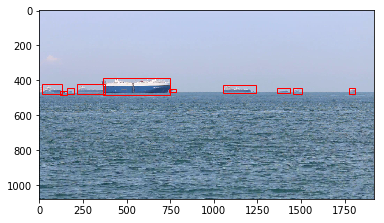

In [30]:
# draw bounding boxes for the image
im = np.array(Image.open(VIDEO_FRAMES_PATH_ONSHORE + video_name + "_frame" + frame +".jpg"), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# for every object in frame crate a rectangle patch
for entry in relevant_objects:
    data = entry.split(',')

    # Create a Rectangle patch
    rect = patches.Rectangle((float(data[1]),float(data[2])),float(data[3]),float(data[4]),linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()